In [ ]:
!pip install ipdb

     |████████████████████████████████| 792 kB 4.4 MB/s 
     |████████████████████████████████| 374 kB 50.6 MB/s 
  Created wheel for ipdb: filename=ipdb-0.13.9-py3-none-any.whl size=11648 sha256=b4ea022c986f844623e99233940a2ec56e3e063162141aa2d4fae7e8e91ee0be
  Stored in directory: /root/.cache/pip/wheels/65/cd/cc/aaf92acae337a28fdd2aa4d632196a59745c8c39f76eaeed01
Successfully built ipdb
  Attempting uninstall: prompt-toolkit
    Found existing installation: prompt-toolkit 1.0.18
    Uninstalling prompt-toolkit-1.0.18:
      Successfully uninstalled prompt-toolkit-1.0.18
  Attempting uninstall: ipython
    Found existing installation: ipython 5.5.0
    Uninstalling ipython-5.5.0:
      Successfully uninstalled ipython-5.5.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jupyter-console 5.2.0 requires prompt-toolkit<2.0.0,>=1.0.0, but you have prompt-toolkit 

In [ ]:
import ipdb
%pdb off

Automatic pdb calling has been turned OFF


In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import sys
import os
import collections

python_file_location = '/content/drive/MyDrive/Colab_Notebooks/scripts'
sys.path.append(os.path.abspath(python_file_location))
data_file_location = '/content/drive/MyDrive/Colab_Notebooks/data'
sys.path.append(os.path.abspath(data_file_location))
%cd drive/MyDrive/Colab_Notebooks
%pwd

/content/drive/MyDrive/Colab_Notebooks


'/content/drive/MyDrive/Colab_Notebooks'

In [ ]:
models_names = ["fasterrcnn_resnet50_fpn", "ssdlite320_mobilenet_v3_large", "yolov5", "detr"]
models_names = ["ssdlite320_mobilenet_v3_large"]
jsons_paths = collections.defaultdict(list)
logging_paths = collections.defaultdict(list)

for models_name in models_names:
    list_of_dirs = os.listdir(os.path.join("data", "logging", models_name))
    for files in list_of_dirs:
        if os.path.isfile(os.path.join("data", "logging", models_name, files)) and files.split(".")[-1] == "json":
            jsons_paths[models_name].append(os.path.join("data", "logging", models_name, files))
            logging_paths[models_name].append(os.path.join("data", "logging", models_name))
print(jsons_paths)

defaultdict(<class 'list'>, {'ssdlite320_mobilenet_v3_large': ['data/logging/ssdlite320_mobilenet_v3_large/000-032_statistics.json']})


In [ ]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams.update({'font.size': 6})

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs


def plot_scatter(legend_labels, headline, legend_headline, layers_kernels_criticality, labels_indices, path_to_logging):
    fig, ax = plt.subplots()
    ax.clear()
    ax.grid(True)
    #ax.axhspan(0, 0.5, facecolor='green', alpha=0.15)
    #ax.axvspan(0.5, 2.0, facecolor='white', alpha=1.0)
    #ax.axhspan(0.5, 1.0, facecolor='yellow', alpha=0.15)
    #ax.axvspan(1.0, 2.0, facecolor='white', alpha=1.0)
    #ax.axvspan(0.5, 1.0, facecolor='yellow', alpha=0.15)
    #ax.axhspan(1.0, 2.0, facecolor='white', alpha=1.0)
    #ax.axhspan(1.0, 2.0, facecolor='red', alpha=0.15)
    #ax.axvspan(1.0, 2.0, facecolor='red', alpha=0.15)
    #ax.axhspan(0, -0.5, facecolor='white', alpha=1.0)
    #ax.axhspan(0, -0.5, facecolor='blue', alpha=0.15)

    # ToDo!
    # Dont do clustering based on kMeans, but clustering based on layers
    np_array_criticality = np.asarray(layers_kernels_criticality, dtype=float)
    np_array_clusters = np.asarray(labels_indices, dtype=int)
    sizes = 55.0 * (np_array_criticality[:, 0]+np_array_criticality[:, 1])
    # Incorrect number of clusters
    # y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(np_array)
    scatter = ax.scatter(np_array_criticality[:, 0], np_array_criticality[:, 1], c=np_array_clusters, s=sizes)
    ax.set_xlim(left=0.0, right=2.0) # std
    ax.set_ylim(bottom=(abs(min(np_array_criticality[:, 0])) + abs(min(np_array_criticality[:, 1]))+ 0.2)* (-1.0), top=2.0) # mean
    #ax.set_title("Criticality mean vs. std for: {}".format(headline))
    # Shrink current axis by 20%
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
    #plt.xlabel("std")
    #plt.ylabel("mean")
    # plt.legend(['First List', 'Second List'], loc='right')
    # produce a legend with the unique colors from the scatter
    # TBD generate at least 20 labels
    indices = np.linspace(0, len(legend_labels)-1, 22).astype(int)
    legend_label = [legend_labels[i] for i in indices]
    legend1 = ax.legend(scatter.legend_elements(num=22)[0], legend_label, loc="center left", title=legend_headline, bbox_to_anchor=(1, 0.5), prop={'size': 6})
    #ax.legend(*scatter.legend_elements(num=5), loc="center left", title="Layers:", bbox_to_anchor=(1, 0.5))
    ax.add_artist(legend1)

    if not os.path.exists(os.path.join(path_to_logging, "neurons_clustering")):
        os.makedirs(os.path.join(path_to_logging, "neurons_clustering"))
    plt.savefig(os.path.join(path_to_logging, "neurons_clustering", headline + "_cluster_img.png"),bbox_inches='tight',dpi=600)

loading annotations into memory...
Done (t=0.52s)
creating index...
index created!
Openning json: ['data/logging/ssdlite320_mobilenet_v3_large/000-032_statistics.json']
data/logging/ssdlite320_mobilenet_v3_large
Statistics will be plotted
How many labels: 82
Example of layers dict: ['backbone.features.0.0.0.weight', 'backbone.features.0.0.1.weight', 'backbone.features.0.1.block.0.0.weight', 'backbone.features.0.1.block.0.1.weight', 'backbone.features.0.1.block.1.0.weight', 'backbone.features.0.1.block.1.1.weight', 'backbone.features.0.2.block.0.0.weight', 'backbone.features.0.2.block.0.1.weight', 'backbone.features.0.2.block.1.0.weight', 'backbone.features.0.2.block.1.1.weight', 'backbone.features.0.2.block.2.0.weight', 'backbone.features.0.2.block.2.1.weight', 'backbone.features.0.3.block.0.0.weight', 'backbone.features.0.3.block.0.1.weight', 'backbone.features.0.3.block.1.0.weight', 'backbone.features.0.3.block.1.1.weight', 'backbone.features.0.3.block.2.0.weight', 'backbone.features

2it [00:02,  1.09s/it]

skipping person


4it [00:08,  2.24s/it]

skipping car


7it [00:18,  2.90s/it]

skipping bus


25it [01:32,  3.74s/it]

skipping zebra


26it [01:37,  4.16s/it]/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # This is added back by InteractiveShellApp.init_path()
29it [01:54,  4.39s/it]

skipping handbag


48it [03:16,  4.02s/it]

skipping bowl


49it [03:19,  3.75s/it]

skipping banana


59it [04:12,  3.91s/it]

skipping chair


62it [04:23,  3.50s/it]

skipping bed


63it [04:25,  3.05s/it]

skipping dining table


65it [04:33,  3.38s/it]

skipping tv


75it [05:16,  3.89s/it]

skipping refrigerator


82it [05:46,  4.22s/it]


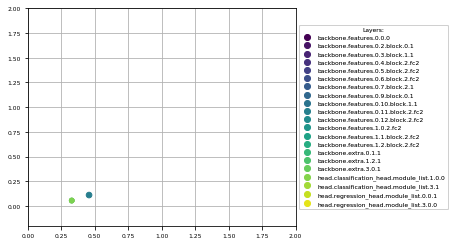

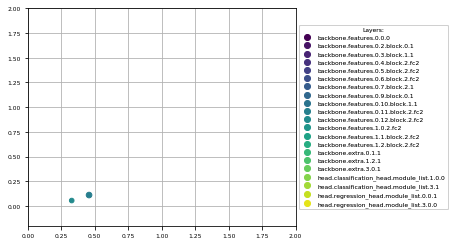

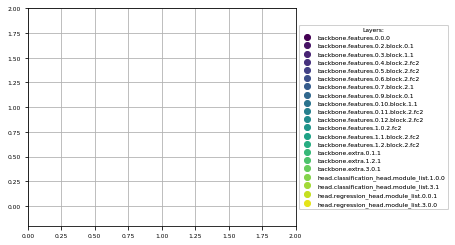

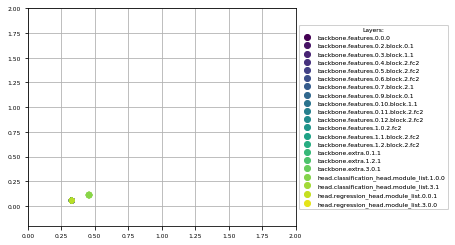

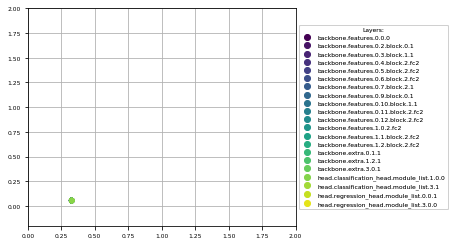

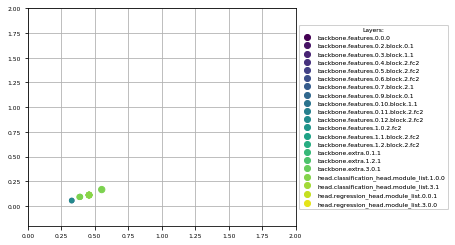

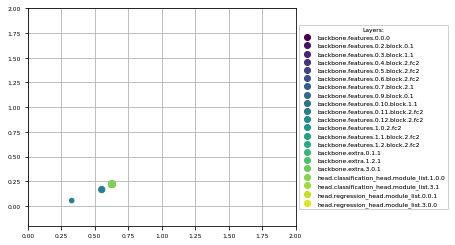

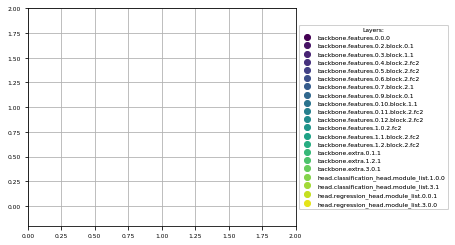

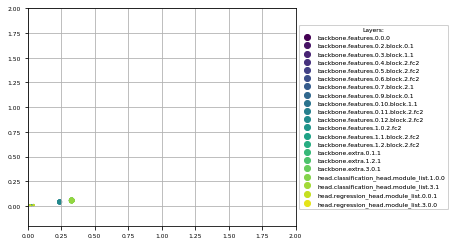

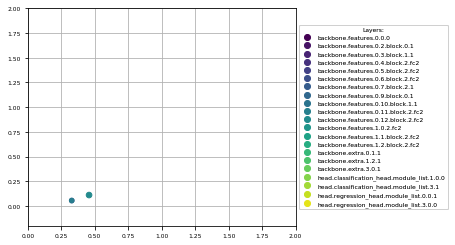

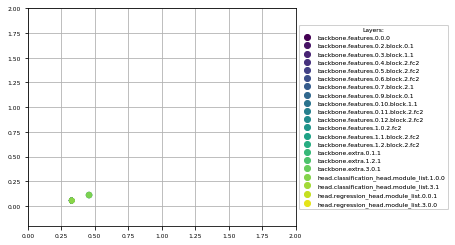

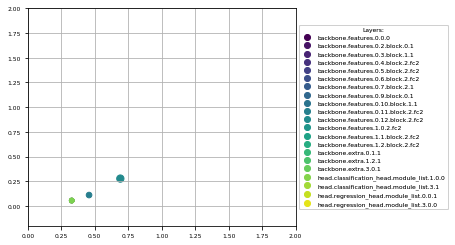

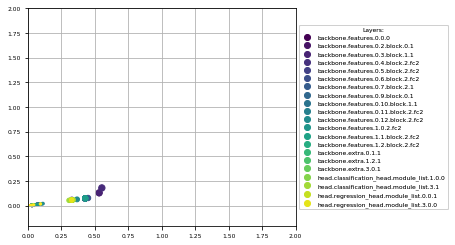

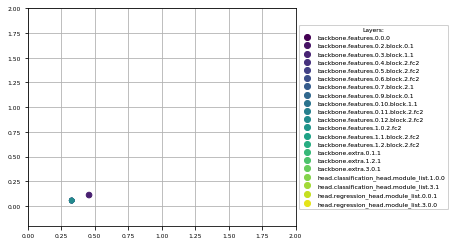

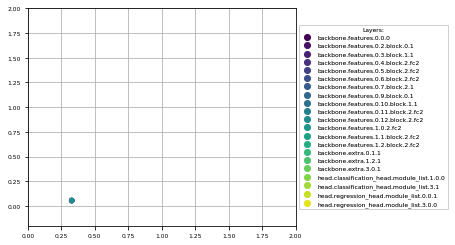

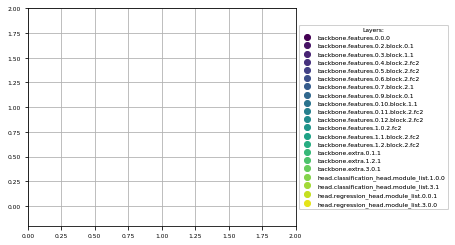

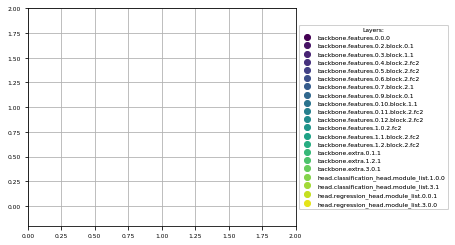

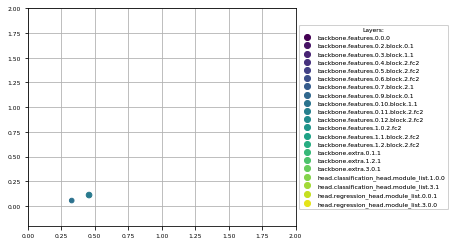

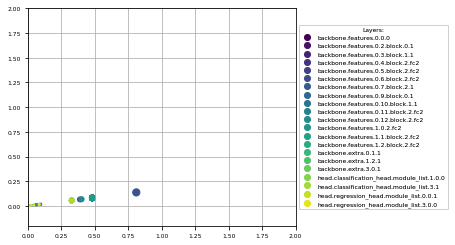

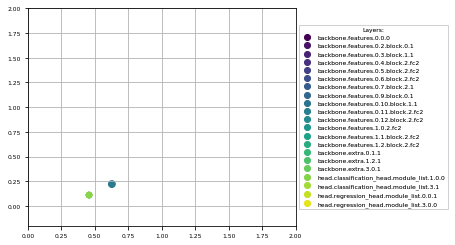

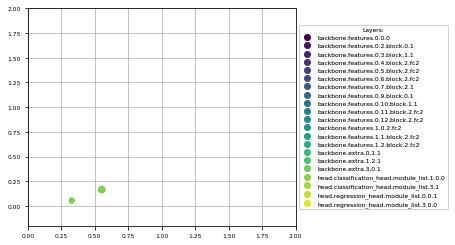

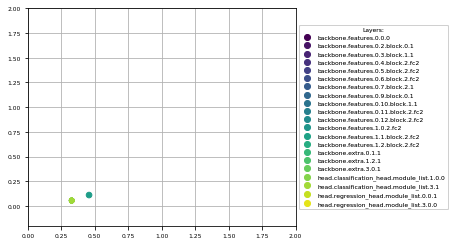

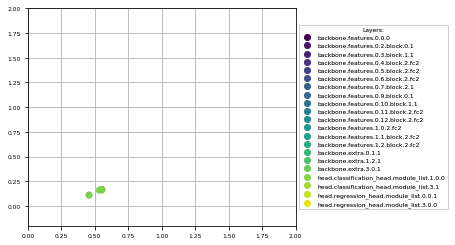

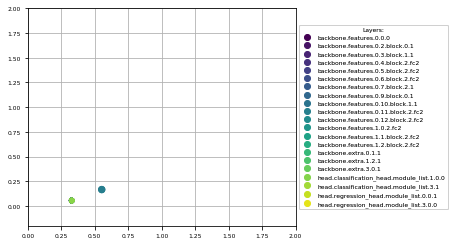

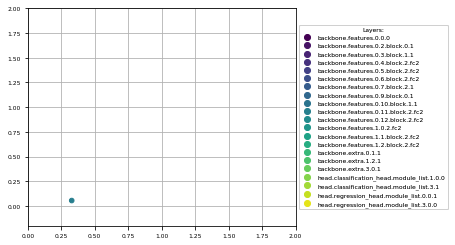

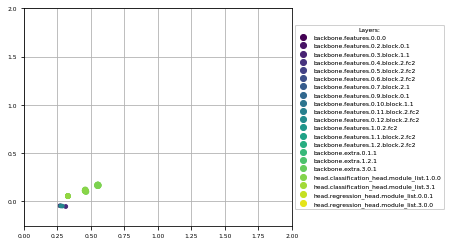

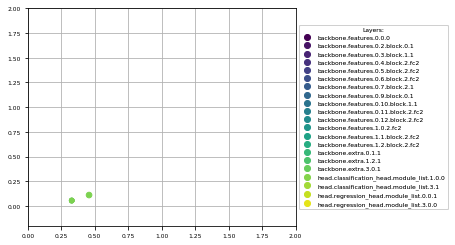

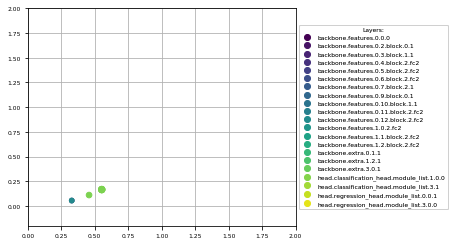

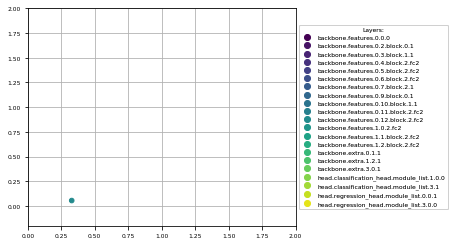

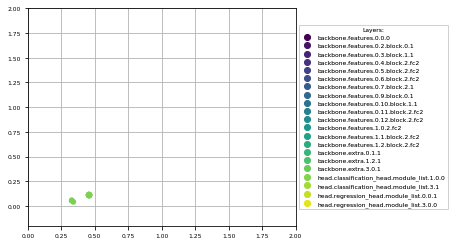

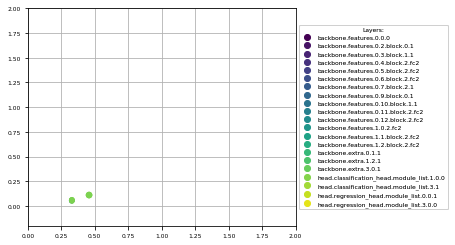

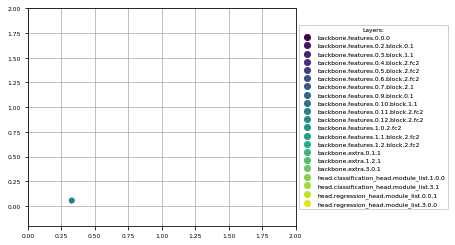

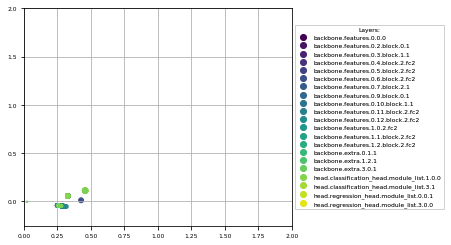

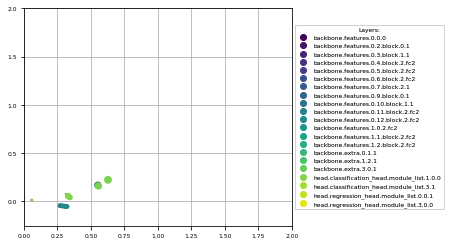

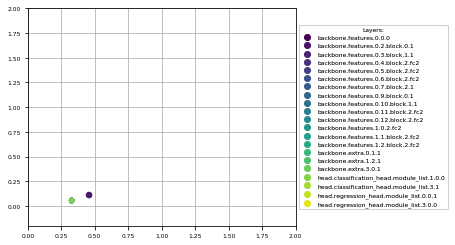

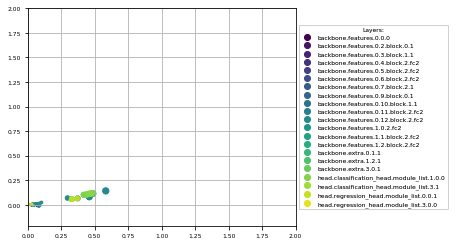

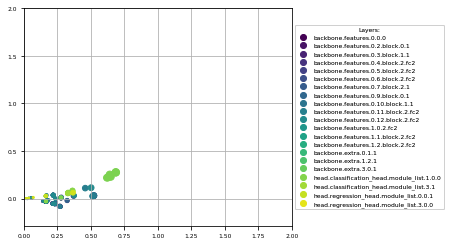

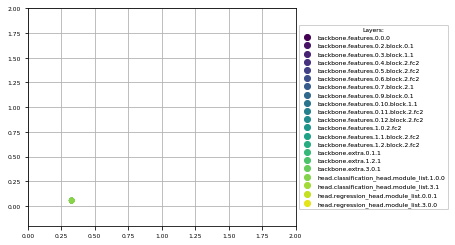

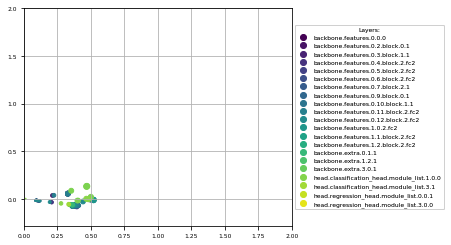

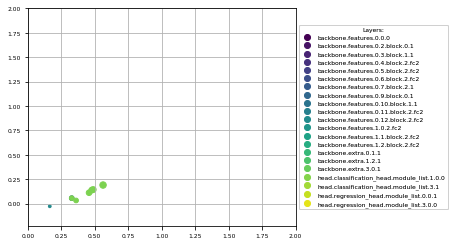

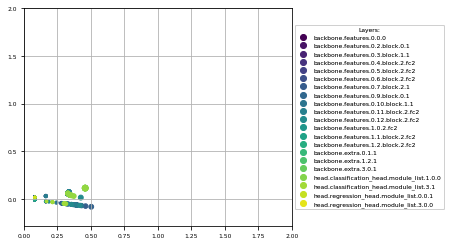

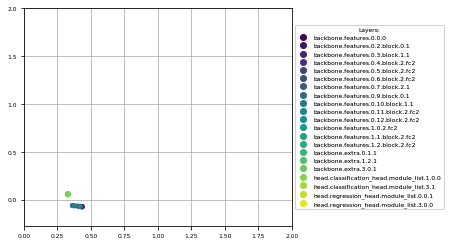

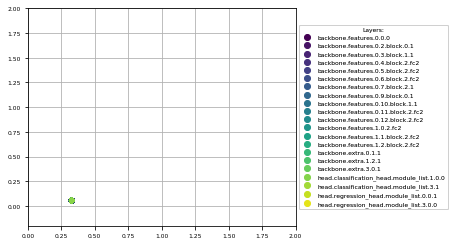

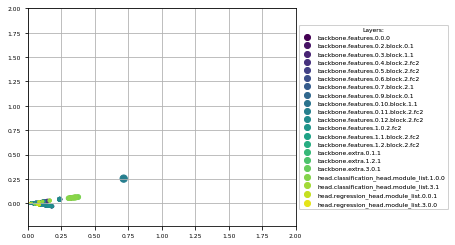

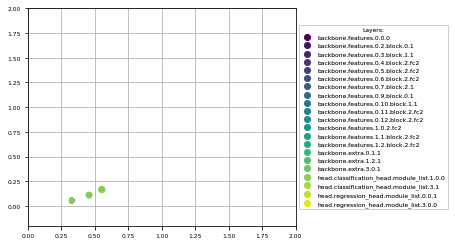

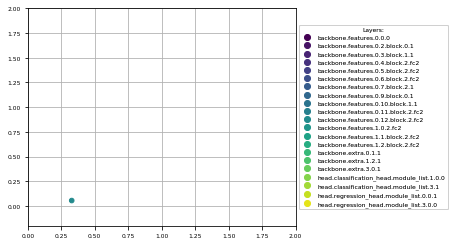

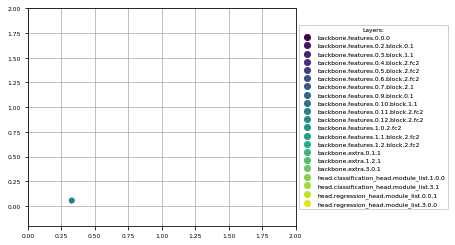

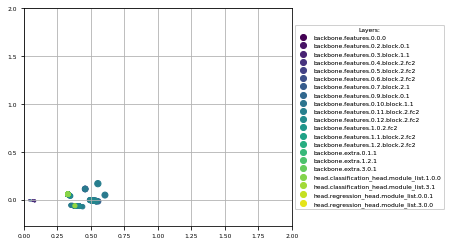

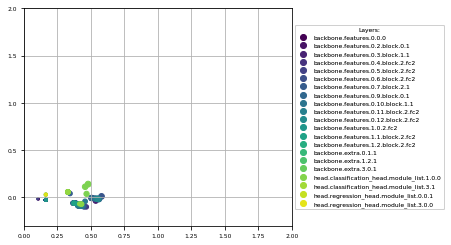

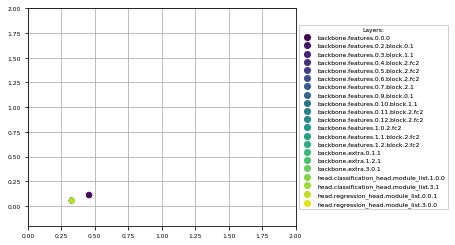

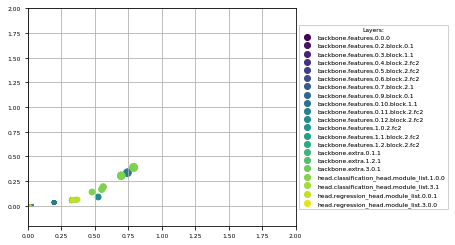

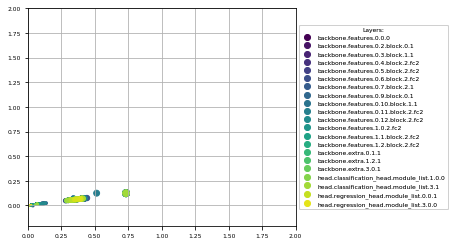

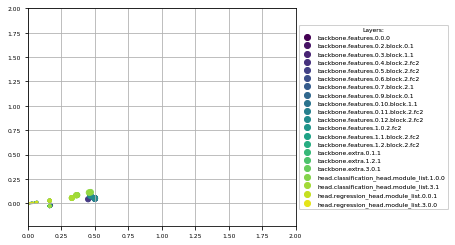

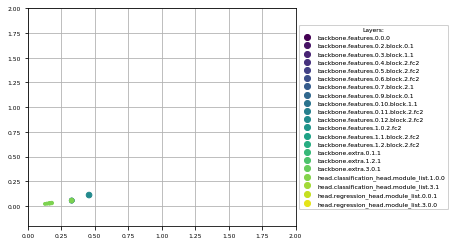

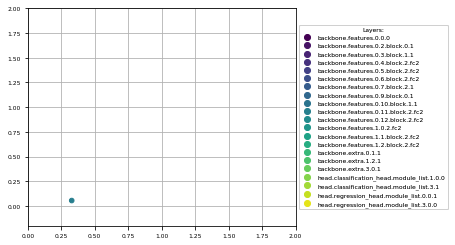

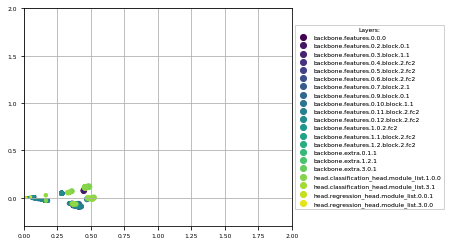

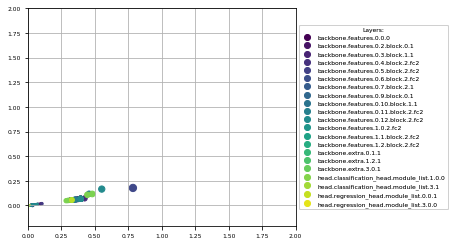

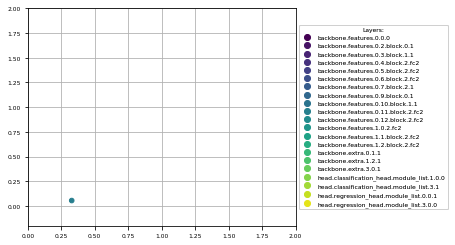

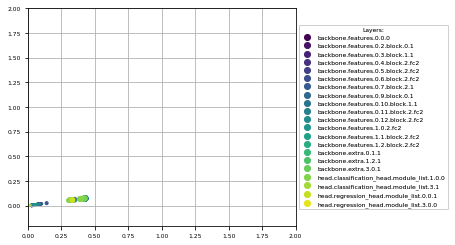

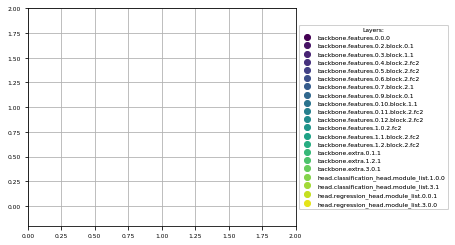

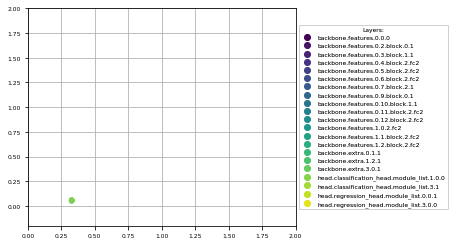

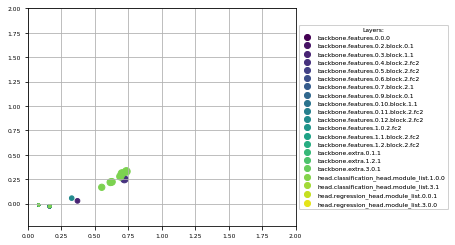

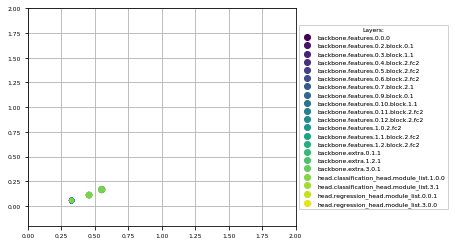

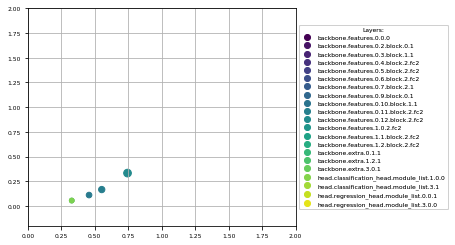

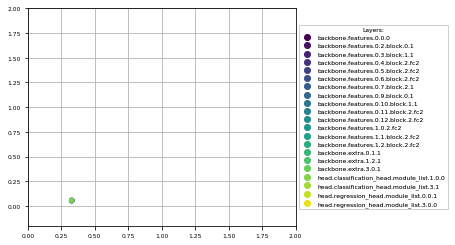

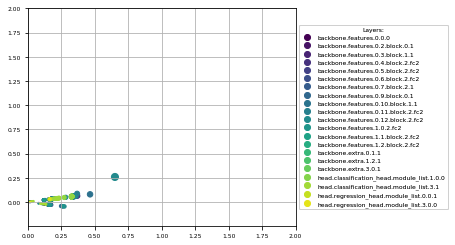

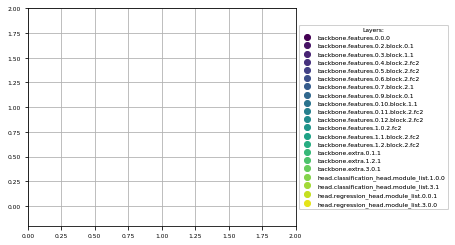

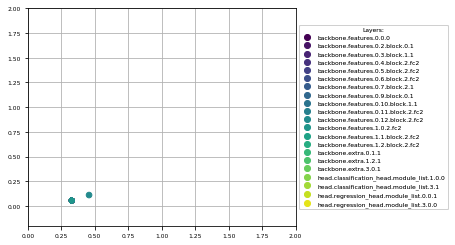

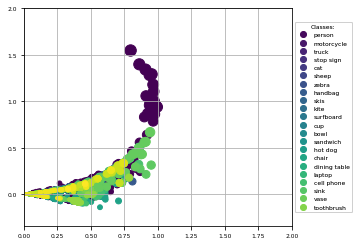

In [ ]:
from tqdm import tqdm
import json
import collections
import numpy as np

path_to_labels = os.path.join("data", "dataset", "labels", "coco_labels.json")
path_to_data = os.path.join("data", "dataset", "coco_dataset", "val2017")
path_to_annotations = os.path.join("data", "dataset", "coco_dataset", "annotations", "instances_val2017.json")

import scripts.dataset as DataSet
dataset = DataSet.CocoDataSet(path_to_data, path_to_annotations, path_to_labels)

path_to_visualization_file = os.path.join("data", "logging", "generated")
#filtered_classes = ["person"]
coco_labels = [label for label in dataset.labels if label not in ["N/A", "__background__"]]
filtered_classes = ["person", "car"]

#def nested_dict():
#    return collections.defaultdict(nested_dict)

#statistics_dict = nested_dict()

for models_name, json_path in jsons_paths.items():
    
    print("Openning json: {}".format(json_path))

    json_file = open(json_path[0], 'r')
    statistics_dict = json.load(json_file)
    json_file.close()

    logging_path = logging_paths[models_name][0]
    print(logging_path)

    number_of_images = len(statistics_dict.keys())
    list_of_layers = list(statistics_dict[filtered_classes[0]].keys())
    print("Statistics will be plotted")
    print("How many labels: {}".format(number_of_images))
    print("Example of layers dict: {}".format(list_of_layers))
    list_of_layers = [(layer.replace(".weight", "")).replace("backbone.body.", "") for layer in list_of_layers]

    layers_kernels_criticality_list = list()
    labels_indices = list()

    for index_label, (class_label, layers) in tqdm(enumerate(statistics_dict.items())):
        label_layers_kernels_criticality_list = list()
        layers_enumeration = list()
        layers_mean = list()

        if class_label not in ["N/A", "__background__"]:

            for layers_index, (layer, kernels) in enumerate(layers.items()):
                for index, kernels_sum_cri_per_image in kernels.items():
                    flattened_list = list()
                    for image_index, image_criticality in kernels_sum_cri_per_image.items():
                        flattened_list.append(image_criticality)

                    #flattened_list = list(itertools.chain.from_iterable(flattened_list))
                    mean = np.mean(np.asarray(flattened_list, dtype=float))
                    std = np.std(np.asarray(flattened_list, dtype=float))
                    layers_kernels_criticality_list.append([std, mean])
                    labels_indices.append(index_label)

                    label_layers_kernels_criticality_list.append([std, mean])
                    layers_enumeration.append(layers_index)
                    layers_mean.append(mean)

            # to assure that only deeply analyzed classes will be visulized   
            # TBD add a condition where at least 20 kernels have criticality > 0.1     
            if sum(mean > 0.05 for mean in layers_mean) < 10 or class_label in ["N/A", "__background__"]:
                print("skipping {}".format(class_label))
                print(layers_mean)
                continue
            else:
                plot_scatter(list_of_layers, class_label, "Layers:", label_layers_kernels_criticality_list, layers_enumeration, logging_path)

    plot_scatter(coco_labels, "all classes", "Classes:", layers_kernels_criticality_list, labels_indices, logging_path)
